In [14]:
import matplotlib.pyplot as plt
import torch
from torchvision.io import read_image
import cv2 as cv
from torchvision.transforms import Resize

In [2]:
path1 = "data/0.png"
path2 = "data/120.png"
path3 = "data/240.png"

front = read_image(path1)
back  = read_image(path2)



In [3]:
front = front.permute(1, 2, 0)
back  = back.permute(1, 2, 0)

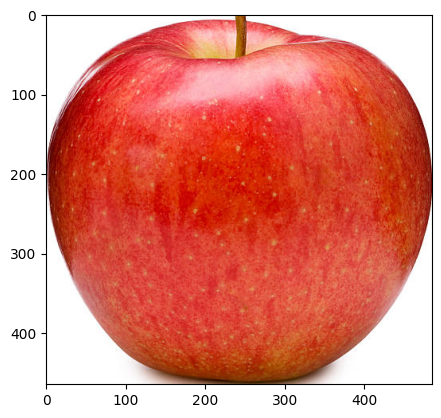

In [4]:
plt.imshow(front[95:560,65:550,:])

In [5]:
image = torch.cat((front[95:560,65:550,:], back[95:560,65:550,:]), dim=1)

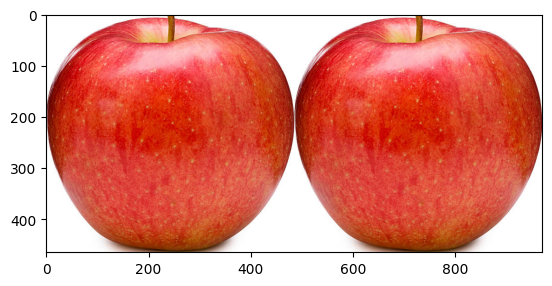

In [6]:
plt.imshow(image)

In [10]:
import numpy as np

def stretch(image, radius=250, power=1.9):
    img = image.numpy()
    
    height, width, _ = img.shape
    right_eye = (height//2,width//2)
    
    map_y = np.zeros((height,width),dtype=np.float32)
    map_x = np.zeros((height,width),dtype=np.float32)
    
    # create index map
    for i in range(height):
        for j in range(width):
            map_y[i][j]=i
            map_x[i][j]=j
    
    # deform around the right eye
    for i in range (-radius, radius):
        for j in range(-radius, radius):
    
            if i > 0:
                map_y[right_eye[1] + i][right_eye[0] + j] = right_eye[1] + (i/radius)**power * radius
            if i < 0:
                map_y[right_eye[1] + i][right_eye[0] + j] = right_eye[1] - (-i/radius)**power * radius
            if j > 0:
                map_x[right_eye[1] + i][right_eye[0] + j] = right_eye[0] + (j/radius)**power * radius
            if j < 0:
                map_x[right_eye[1] + i][right_eye[0] + j] = right_eye[0] - (-j/radius)**power * radius
    
    return cv.remap(img,map_x,map_y,cv.INTER_LINEAR)
    

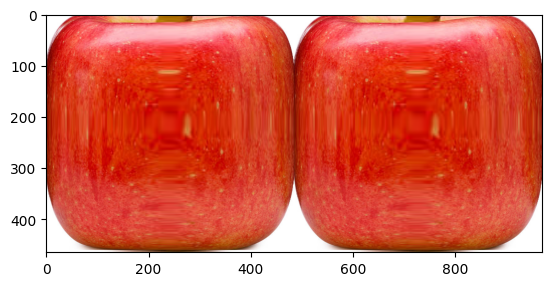

In [13]:
str_front = stretch(front)[95:560,65:550,:]
str_back  = stretch(back)[95:560,65:550,:]



full = np.concatenate((str_front, str_back), axis=1)
plt.imshow(full)

In [26]:
path = "data/"
resize = Resize((612,612))

im1 = read_image(f"{path}1.jpeg")
im2 = read_image(f"{path}2.jpeg")
im3 = read_image(f"{path}3.jpeg")

im1 = resize(im1).permute(1, 2, 0)
im2 = resize(im2).permute(1, 2, 0)
im3 = resize(im3).permute(1, 2, 0)

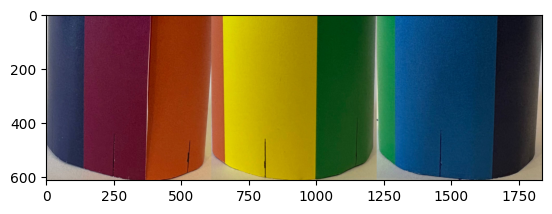

In [27]:
full = torch.cat((im1, im3, im2), dim=1)
plt.imshow(full)

In [29]:
def circular_ROI(sweep, bbox):
    H, W, _ = sweep.shape
    y1, x1, y2, x2 = bbox

    if 0 <= y1 < H and 0 <= x1 < W:
        if 0 <= y2 < H:
            # тривиальный случай
            if 0 <= x2 < W:
                return sweep[y1:y2, x1:x2, :]
                
            # правая граница вылезла за рамку
            else:
                left_part = sweep[y1:y2, x1:, :]
                bias = abs(x2 - W)
                right_part = sweep[y1:y2, :bias, :]

                return torch.cat((left_part, right_part), dim=1)
        else:
            raise IndexError("y2 bounds out of sweep")
    else:
        raise IndexError("first point out of sweep")
        

In [30]:
ROI = circular_ROI(full, (200, 1700, 400, 1900))

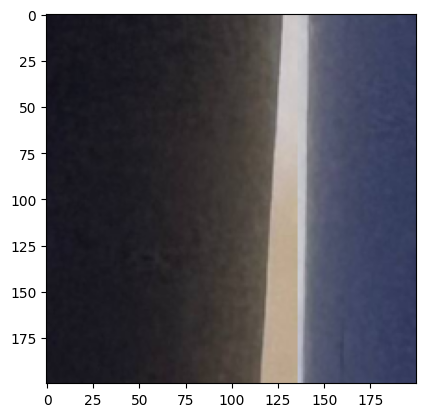

In [31]:
plt.imshow(ROI)

In [45]:
path = "data/"
resize = Resize((612,612))

im1 = read_image(f"{path}0.png")
im2 = read_image(f"{path}120.png")
im3 = read_image(f"{path}240.png")

im1 = resize(im1).permute(1, 2, 0)
im2 = resize(im2).permute(1, 2, 0)
im3 = resize(im3).permute(1, 2, 0)

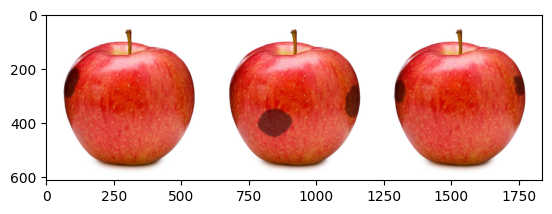

In [46]:
full = torch.cat((im1, im2, im3), dim=1)
plt.imshow(full)

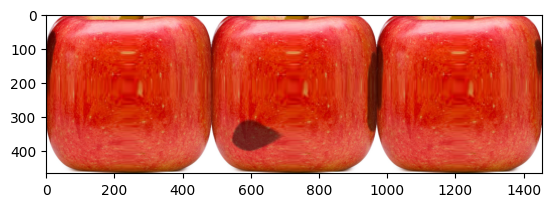

In [47]:
im1 = stretch(im1)[95:560,65:550,:]
im2 = stretch(im2)[95:560,65:550,:]
im3 = stretch(im3)[95:560,65:550,:]

full = np.concatenate((im1, im2, im3), axis=1)
plt.imshow(full)

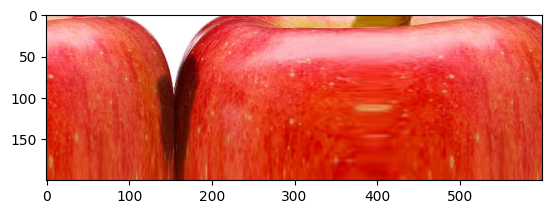

In [48]:
ROI = circular_ROI(torch.tensor(full), (0, 1300, 200, 1900))

plt.imshow(ROI)

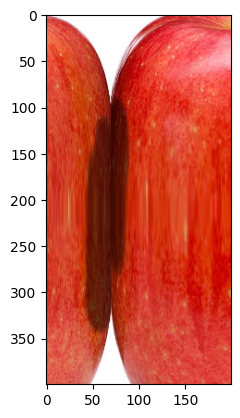

In [49]:
ROI = circular_ROI(torch.tensor(full), (0, 900, 400, 1100))

plt.imshow(ROI)